In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv("C:/Users/User/Downloads/diabetes (2).csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [8]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [9]:
np.sum(data.isnull().any(axis=1))

0

In [10]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [11]:
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)  # Replace zero skin thinness
data['Insulin'] = data['Insulin'].replace(0, np.nan)  # Replace zero insulin levels
data.fillna(data.median(), inplace=True) 

<Axes: xlabel='Pregnancies', ylabel='count'>

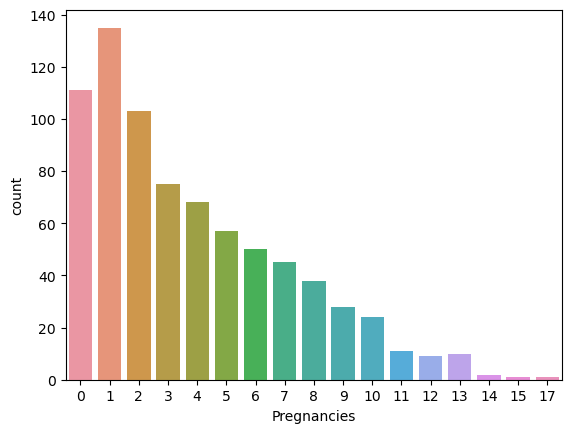

In [12]:
sns.countplot(x='Pregnancies', data=data)

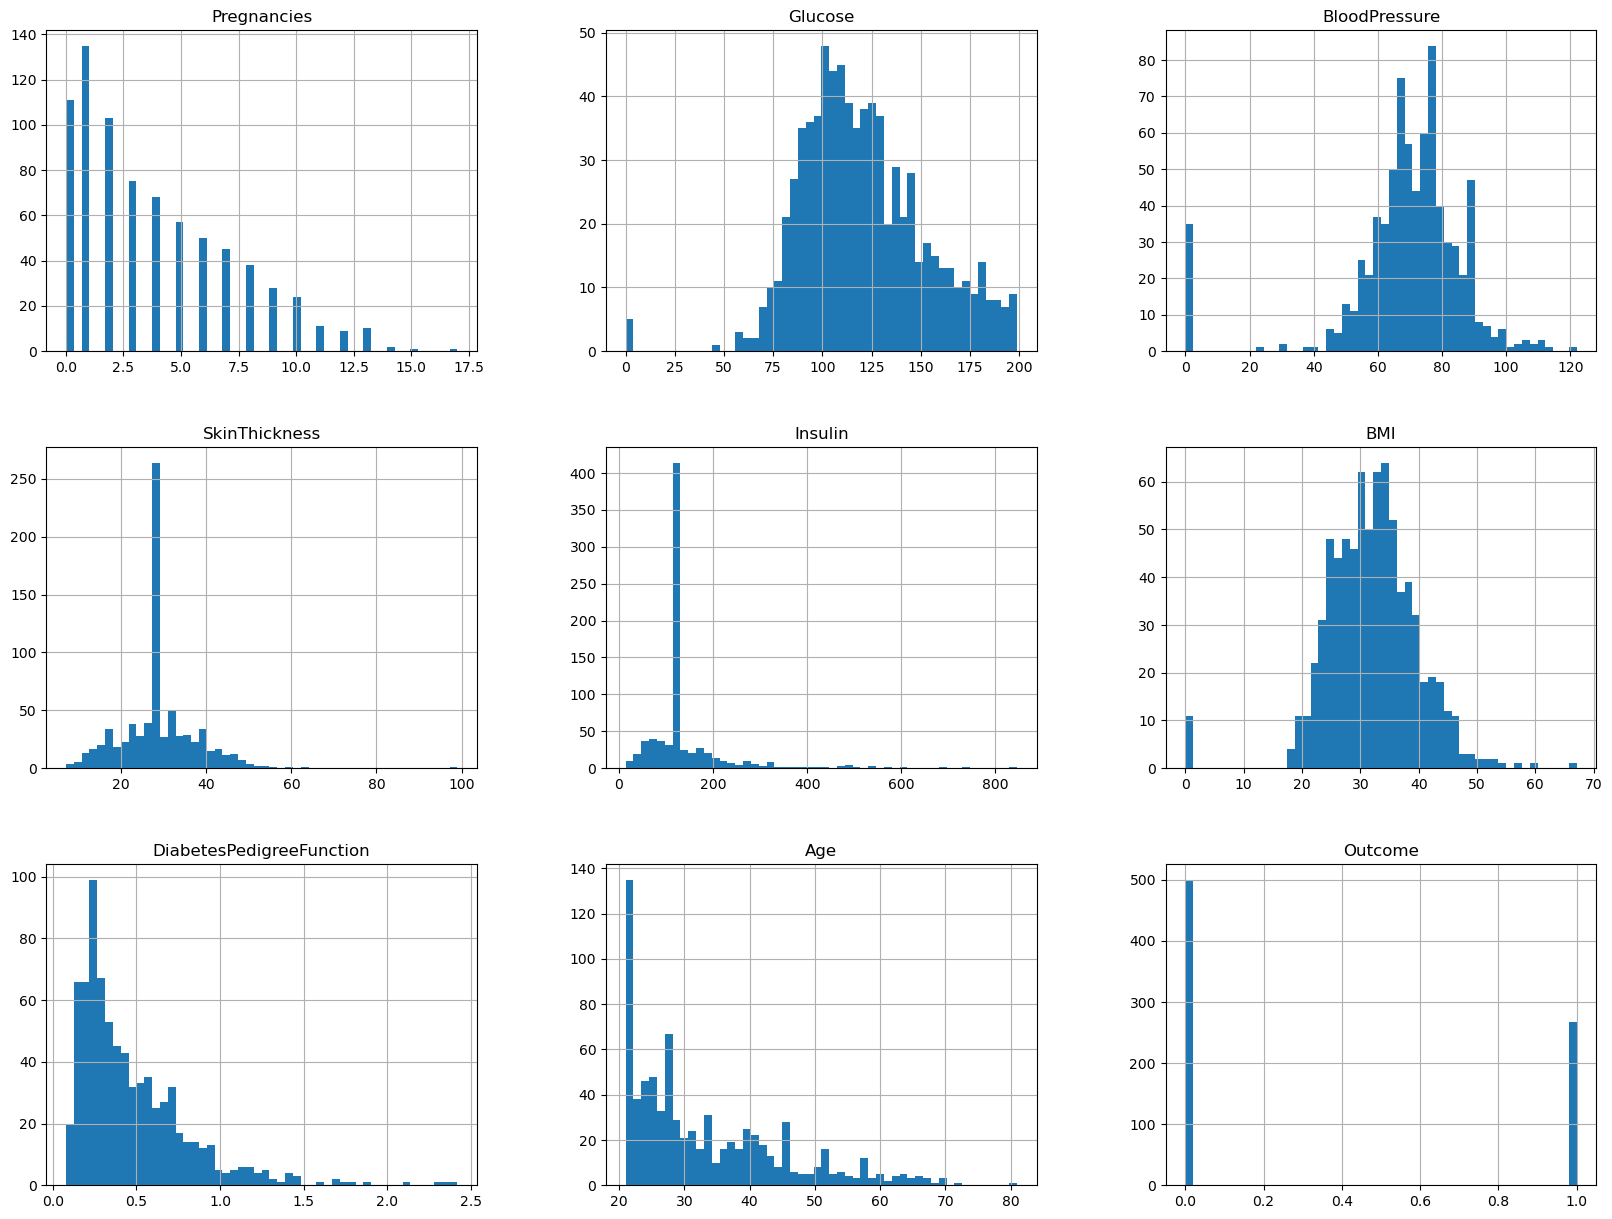

In [13]:
data.hist(bins =50, figsize=(20,15))
plt.show()

In [14]:
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.065068
Name: Outcome, dtype: float64

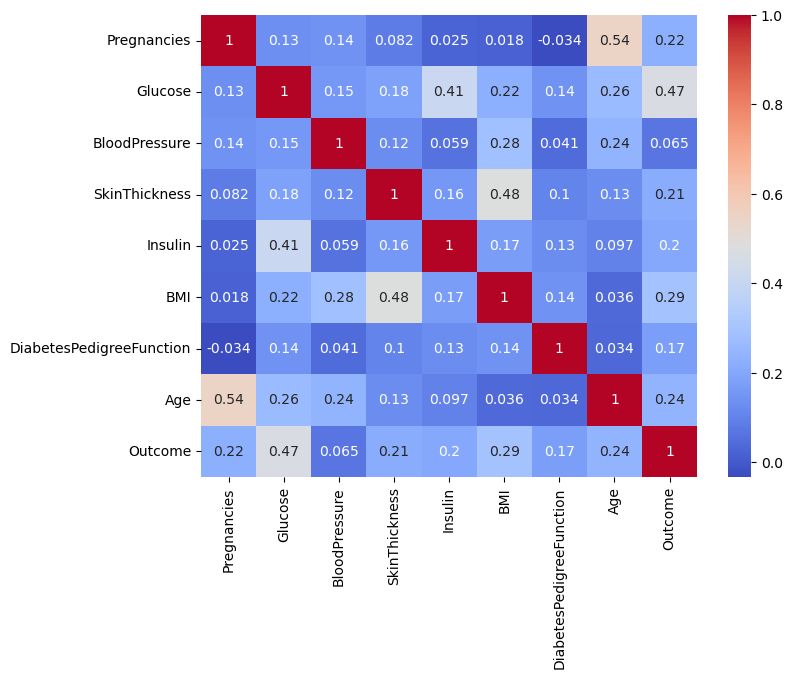

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')
plt.show()

In [16]:
y = data['Outcome']

In [17]:
X = data.drop('Outcome', axis=1)

In [18]:
#Splitting Data for training and testing in two parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=52)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6818181818181818
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       100
           1       0.55      0.52      0.53        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.65       154
weighted avg       0.68      0.68      0.68       154



In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
y_pred_dt = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_dt))

Random Forest Accuracy: 0.7987012987012987
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       100
           1       0.72      0.70      0.71        54

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



In [22]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_dt = lr_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.7922077922077922
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       100
           1       0.73      0.65      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



In [23]:
data.to_csv('data.csv')